## Python: ray-optics
The python package [ray-optics](https://ray-optics.readthedocs.io/en/latest/) is used to read some CodeV .seq files and ZEMAX .zmx files and do some analyses. Please install the most recent version of ray-optics, with "conda install -c conda-forge rayoptics==0.8.1" if 0.8.1 is the actual version.

In [1]:


%matplotlib inline
# initialization
from rayoptics.environment import *



ImportError: cannot import name 'Protocol' from 'typing' (C:\Users\herbst\Anaconda3\envs\mypython37\lib\typing.py)

In [2]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [3]:
opm, info = open_model(root_pth/"zemax/tests/354710-C-Zemax(ZMX).zmx", info=True)

In [4]:
info

({'VERS': '140124 258 36214',
  'pupil': ('aperture', 'object', 'pupil'),
  'FTYP': '0 0 1 1 0 0 0',
  'STANDARD': 5,
  'EVENASPH': 1,
  'CONI': 1,
  'conj type': 'infinite',
  '# surfs': 6,
  '# wvls': 1,
  'fov': ('field', 'object', 'angle'),
  '# fields': 1,
  'GCAT': ['LIGHTPATH', 'SCHOTT'],
  'glass substituted': 2,
  'encoding': 'utf-16'},
 {'D-ZK3M': ('D-ZK3', 'CDGM'), 'BK7': ('BK7', 'Robb1983.SCHOTT')})

In [5]:
opm


In [8]:
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']

In [9]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
 Stop:     1.182174     0.862527     D-ZK3             1     0.75000
    2:     0.000000     0.523243       air             1     0.57417
    3:     0.000000     0.250000       BK7             1     0.24917
    4:     0.000000     0.249999       air             1     0.15527
  Img:     0.000000      0.00000                       1  8.9134e-06


In [10]:
pm.first_order_data()

efl               1.483
ffl              -1.483
pp1           1.647e-16
bfl              0.2446
ppk               1.239
f/#              0.9889
m            -1.483e-10
red          -6.742e+09
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius         0.75
na obj          7.5e-11
n obj                 1
img_dist         0.2446
img_ht          0.02589
exp_dist         -1.244
exp_radius         0.75
na img          -0.4512
n img                 1
optical invariant      0.01309


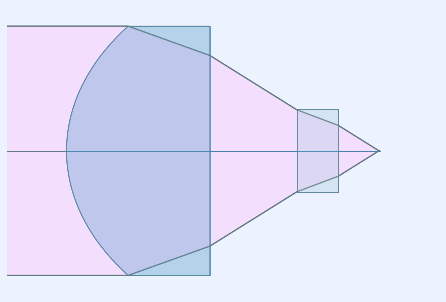

In [11]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

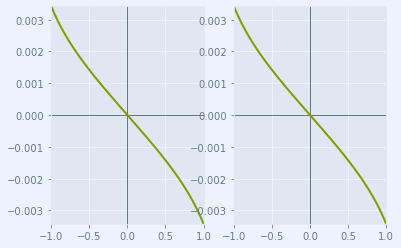

In [12]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray',
                     scale_type=Fit.All_Same).plot()

One can see that not any glass is recognized:

In [14]:
filename = r'C:\Work\OpTaliX\Test\AFL12-15.zmx'
opm, info = open_model(filename, info=True)
info

({'pupil': ('aperture', 'object', 'pupil'),
  'FTYP': '0 0',
  'STANDARD': 3,
  'EVENASPH': 1,
  'CONI': 1,
  'conj type': 'finite',
  '# surfs': 4,
  '# wvls': 1,
  'fov': ('field', 'object', 'angle'),
  '# fields': 1,
  'GCAT': ['SPECIAL'],
  'glass not found': 1,
  'encoding': 'utf-8'},
 {'C79-80': 1})